#### Project Description

This section of the project involves conducting a detailed empirical analysis of the cryptocurrency market, focusing specifically on the interlinkages among various cryptocurrency assets and the broader blockchain ecosystem. The objective is to gain deeper insights into the dynamics of the crypto market through a structured examination of selected cryptocurrencies over a defined period.

##### Objectives

- **Select and Analyze Cryptocurrencies**: Choose five cryptocurrencies based on daily price data from January 1, 2022, to December 31, 2022, and conduct a detailed analysis.
- **Price Trend Analysis**: Plot daily price movements and analyze the trends.
- **Volatility Assessment**: Calculate daily returns, assess volatility, and identify which cryptocurrency exhibits the most and least variation.
- **Correlation Analysis**: Construct a correlation matrix for the cryptocurrencies to explore their interrelationships.
- **Market Event Impact Analysis**: Examine the effect of the FTX bankruptcy on selected cryptocurrencies in November 2022.
- **Comparative Market Analysis**: Extend the analysis to include a comparison with the S&P 500 index, analyzing similarities and differences in market behavior.

##### Tools and Libraries

This analysis will employ several Python libraries:
- `pandas` for data manipulation,
- `numpy` for numerical operations,
- `matplotlib` and `seaborn` for data visualization.

This notebook will document our analytical processes, findings, and provide a rationale behind our analysis decisions. It serves as a professional report for the project submission.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set up visualization style
plt.style.use('ggplot')  # 'ggplot' style for all matplotlib plots
sns.set_context('talk')  # context = "talk", which is ideal for presentations

In [5]:
# Two decimal places formatting
pd.options.display.float_format = "{:,.2f}".format

In [4]:
# Debugging settings
pd.set_option('display.max_columns', None)  # Unhide all columns if needed during debugging

#### Selection of Cryptocurrencies

For the analysis, we have selected the following five cryptocurrencies:

- **Bitcoin (BTC)**: The first and most well-known cryptocurrency, often referred to as digital gold.
- **Ethereum (ETH)**: Known for its smart contract functionality, Ethereum is a primary platform for numerous decentralized applications.
- **XRP**: Originally created by Ripple Labs, XRP is known for its digital payment protocol more than its status as a cryptocurrency.
- **Dogecoin (DOGE)**: Initially started as a meme, Dogecoin has garnered a significant following and use case in tipping and charitable donations.
- **Tether (USDT)**: As a stablecoin pegged to the US dollar, Tether offers stability in the highly volatile crypto market.

Each of these cryptocurrencies has been chosen to provide a diverse view across different uses and markets in the crypto ecosystem.

##### Data Fetching

The following Python code will be used to fetch daily price data for these cryptocurrencies from January 1, 2022, to December 31, 2022. The data is sourced from Yahoo Finance using the `pandas_datareader` library.

In [59]:
# More lib
import yfinance as yf
from pandas import DataFrame

In [58]:
# Data timeframe
start_date = '2022-01-01'
end_date = '2022-12-31'

# Crypto tickers (yf)
cryptos = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'DOGE-USD', 'USDT-USD']

# Fetch data
crypto_data = {crypto: yf.Ticker(crypto).history(start=start_date, end=end_date) for crypto in cryptos}

In [60]:
# Function to display head and tail of the DataFrame
def display_head_tail(df: DataFrame, num_rows: int = 3) -> None:
    display(pd.concat([df.head(num_rows), df.tail(num_rows)]))

In [61]:
# Display head & tail
for crypto, data in crypto_data.items():
    print(f"\n{crypto} Data Snapshot:")
    display_head_tail(data, 5)


BTC-USD Data Snapshot:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-01 00:00:00+00:00,"46,311.75","47,827.31","46,288.48","47,686.81",24582667004,0.00,0.00
2022-01-02 00:00:00+00:00,"47,680.93","47,881.41","46,856.94","47,345.22",27951569547,0.00,0.00
2022-01-03 00:00:00+00:00,"47,343.54","47,510.73","45,835.96","46,458.12",33071628362,0.00,0.00
2022-01-04 00:00:00+00:00,"46,458.85","47,406.55","45,752.46","45,897.57",42494677905,0.00,0.00
2022-01-05 00:00:00+00:00,"45,899.36","46,929.05","42,798.22","43,569.00",36851084859,0.00,0.00
2022-12-26 00:00:00+00:00,"16,842.25","16,920.12","16,812.37","16,919.80",11886957804,0.00,0.00
2022-12-27 00:00:00+00:00,"16,919.29","16,959.85","16,642.07","16,717.17",15748580239,0.00,0.00
2022-12-28 00:00:00+00:00,"16,716.40","16,768.17","16,497.56","16,552.57",17005713920,0.00,0.00
2022-12-29 00:00:00+00:00,"16,552.32","16,651.76","16,508.68","16,642.34",14472237479,0.00,0.00



ETH-USD Data Snapshot:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-01 00:00:00+00:00,"3,683.05","3,769.92","3,682.29","3,769.70",9776191466,0.00,0.00
2022-01-02 00:00:00+00:00,"3,769.30","3,836.16","3,727.36","3,829.56",9881471548,0.00,0.00
2022-01-03 00:00:00+00:00,"3,829.54","3,836.20","3,698.05","3,761.38",12080777893,0.00,0.00
2022-01-04 00:00:00+00:00,"3,761.36","3,876.79","3,723.35","3,794.06",14030925983,0.00,0.00
2022-01-05 00:00:00+00:00,"3,794.27","3,842.06","3,456.75","3,550.39",18061338502,0.00,0.00
2022-12-26 00:00:00+00:00,"1,218.92","1,226.97","1,214.34","1,226.97",3282098400,0.00,0.00
2022-12-27 00:00:00+00:00,"1,226.99","1,230.42","1,205.90","1,212.79",4091530737,0.00,0.00
2022-12-28 00:00:00+00:00,"1,212.74","1,213.13","1,185.70","1,189.99",4991669631,0.00,0.00
2022-12-29 00:00:00+00:00,"1,190.01","1,204.14","1,188.36","1,201.60",4132233940,0.00,0.00



XRP-USD Data Snapshot:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-01 00:00:00+00:00,0.83,0.85,0.83,0.85,1156464024,0.00,0.00
2022-01-02 00:00:00+00:00,0.85,0.86,0.84,0.86,1134033205,0.00,0.00
2022-01-03 00:00:00+00:00,0.86,0.86,0.82,0.83,1428968710,0.00,0.00
2022-01-04 00:00:00+00:00,0.83,0.84,0.82,0.82,1514079366,0.00,0.00
2022-01-05 00:00:00+00:00,0.82,0.84,0.73,0.77,2252733064,0.00,0.00
2022-12-26 00:00:00+00:00,0.35,0.37,0.35,0.37,797909103,0.00,0.00
2022-12-27 00:00:00+00:00,0.37,0.37,0.36,0.37,905248563,0.00,0.00
2022-12-28 00:00:00+00:00,0.37,0.37,0.36,0.36,839617676,0.00,0.00
2022-12-29 00:00:00+00:00,0.36,0.36,0.34,0.34,898022518,0.00,0.00



DOGE-USD Data Snapshot:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-01 00:00:00+00:00,0.17,0.17,0.17,0.17,371336089,0.00,0.00
2022-01-02 00:00:00+00:00,0.17,0.18,0.17,0.17,391041933,0.00,0.00
2022-01-03 00:00:00+00:00,0.17,0.17,0.17,0.17,505900382,0.00,0.00
2022-01-04 00:00:00+00:00,0.17,0.17,0.17,0.17,541922892,0.00,0.00
2022-01-05 00:00:00+00:00,0.17,0.17,0.15,0.16,994086848,0.00,0.00
2022-12-26 00:00:00+00:00,0.08,0.08,0.07,0.08,248935710,0.00,0.00
2022-12-27 00:00:00+00:00,0.08,0.08,0.07,0.07,290428818,0.00,0.00
2022-12-28 00:00:00+00:00,0.07,0.07,0.07,0.07,496350491,0.00,0.00
2022-12-29 00:00:00+00:00,0.07,0.07,0.07,0.07,285144119,0.00,0.00



USDT-USD Data Snapshot:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-01 00:00:00+00:00,1.00,1.00,1.00,1.00,43336209524,0.00,0.00
2022-01-02 00:00:00+00:00,1.00,1.00,1.00,1.00,43202922802,0.00,0.00
2022-01-03 00:00:00+00:00,1.00,1.00,1.00,1.00,54125933259,0.00,0.00
2022-01-04 00:00:00+00:00,1.00,1.00,1.00,1.00,60765931554,0.00,0.00
2022-01-05 00:00:00+00:00,1.00,1.00,1.00,1.00,77225535519,0.00,0.00
2022-12-26 00:00:00+00:00,1.00,1.00,1.00,1.00,14986560291,0.00,0.00
2022-12-27 00:00:00+00:00,1.00,1.00,1.00,1.00,18554435182,0.00,0.00
2022-12-28 00:00:00+00:00,1.00,1.00,1.00,1.00,21161758512,0.00,0.00
2022-12-29 00:00:00+00:00,1.00,1.00,1.00,1.00,18567214596,0.00,0.00


In [62]:
# NaN check
for crypto, data in crypto_data.items():
    print(f"\nMissing data in {crypto}:")
    print(data.isnull().sum())


Missing data in BTC-USD:
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Missing data in ETH-USD:
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Missing data in XRP-USD:
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Missing data in DOGE-USD:
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Missing data in USDT-USD:
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


##### Detailed Overview & Crypto Protocol

*Bitcoin (BTC)*

- **Overview**: Introduced in 2009 by an individual or group under the pseudonym Satoshi Nakamoto, Bitcoin is the first cryptocurrency ever created. It is designed as a decentralized digital currency without a central bank or single administrator. Bitcoin can be sent from user to user on the peer-to-peer bitcoin network without intermediaries.
- **Protocol**: Bitcoin operates on a proof-of-work (PoW) blockchain protocol, where miners use computational power to solve complex mathematical problems and verify transactions, securing the network and earning bitcoins as a reward.

*Ethereum (ETH)*

- **Overview**: Ethereum was launched in 2015 and is not just a cryptocurrency but also a platform for developing decentralized applications (DApps) using smart contracts. Ethereum aims to create a decentralized suite of financial products that anyone in the world can freely access, regardless of nationality, ethnicity, or faith.
- **Protocol**: Ethereum currently uses a proof-of-work mechanism similar to Bitcoin but is in the process of transitioning to proof-of-stake (PoS) with its Ethereum 2.0 upgrade, aiming to improve scalability and energy efficiency.

*XRP (Ripple)*

- **Overview**: XRP was created by Ripple Labs Inc. in 2012 as part of a digital payment network and protocol. Unlike many other cryptocurrencies, XRP doesn't use a blockchain to achieve a network-wide consensus for transactions. Instead, it uses an iterative consensus process that makes it faster and more energy-efficient than Bitcoin.
- **Protocol**: XRP Ledger employs a consensus protocol that validates account balances and transactions by polling multiple nodes instead of using a traditional blockchain mining method.

*Dogecoin (DOGE)*

- **Overview**: Initially started as a joke in 2013 based on the popular "Doge" meme featuring a Shiba Inu dog, Dogecoin's community has grown significantly. It is used primarily for tipping online content creators and charitable donations.
- **Protocol**: Dogecoin uses a proof-of-work algorithm similar to Litecoin's, which is less energy-intensive than Bitcoin's version. It uses a Scrypt algorithm, which allows for quicker processing of transactions.

*Tether (USDT)*

- **Overview**: Tether was launched in 2014 and is a stablecoin that is pegged to the US dollar. It is designed to combine the unrestricted nature of cryptocurrencies — which can be sent between users without a trusted third-party intermediary — with the stable value of the US dollar.
- **Protocol**: Tether operates on multiple protocols including the Bitcoin blockchain via the Omni Layer Protocol, and on the Ethereum blockchain as an ERC-20 token, among others.

##### Crypto Selection Rationale

- **Diversity and Relevance**: Our group selected these five cryptocurrencies due to their diverse applications and significance in the crypto market. Bitcoin and Ethereum represent the cornerstone of the cryptocurrency world, with extensive adoption and ongoing developments.
- **Technological Diversity**: XRP and Tether showcase variations in blockchain technology applications, especially in how they manage transactions and consensus without traditional mining.
- **Community and Innovation**: Dogecoin is an example of how a community can drive the value and adoption of a currency that started as a joke but has now been used in substantial charitable acts and online tipping.
- **Market Stability and Innovations**: Tether brings a perspective on how cryptocurrencies can be stabilized against the US dollar to reduce volatility, which is a significant concern for typical cryptocurrencies like Bitcoin and Ethereum.

#### Daily Price Plot

In [63]:
# Plot lib
import matplotlib.pyplot as plt

In [64]:
# Re-fetch (lazy)
crypto_data = {crypto: yf.Ticker(crypto).history(start=start_date, end=end_date)['Close'] for crypto in cryptos}

# Dict conv
crypto_prices = pd.DataFrame(crypto_data)

In [70]:
# Dict conv
crypto_prices = pd.DataFrame(crypto_data)

# Save to csv
crypto_prices.to_csv('crypto_prices.csv', index=True)

In [71]:
# Standardize
standardized_prices = (crypto_prices - crypto_prices.mean()) / crypto_prices.std()

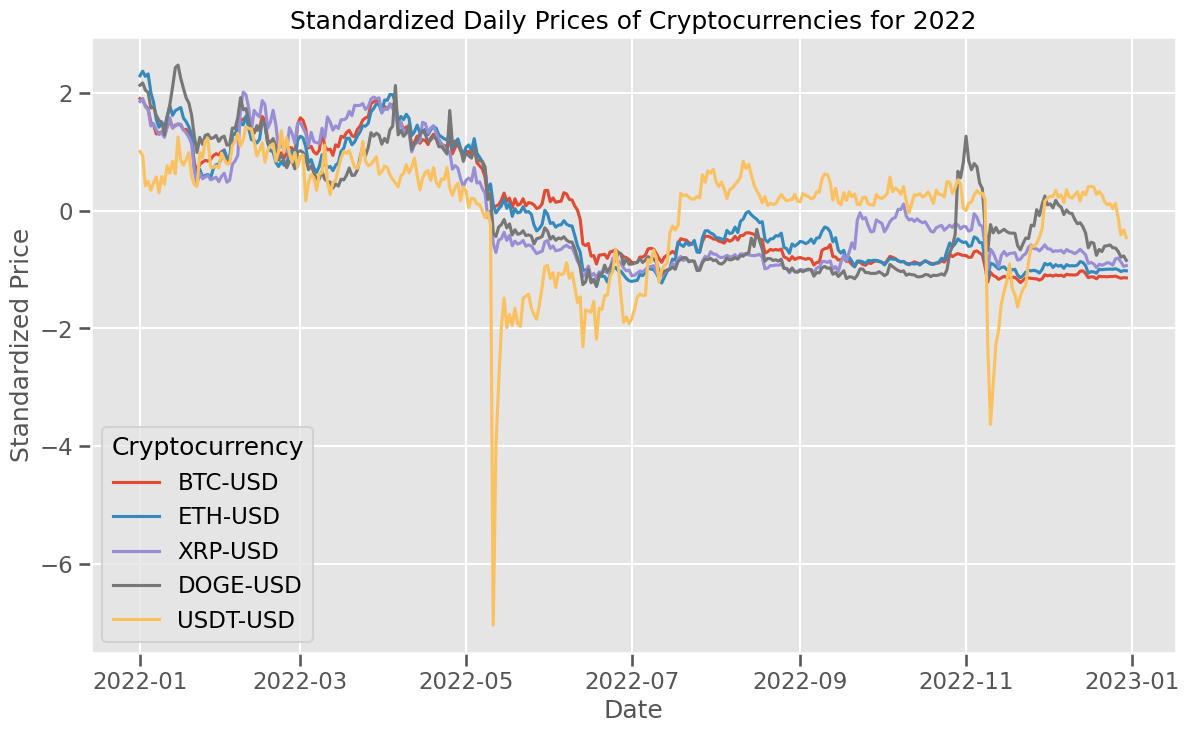

In [72]:
# Plot
plt.figure(figsize=(14, 8))
for crypto in standardized_prices.columns:
    plt.plot(standardized_prices.index, standardized_prices[crypto], label=crypto)

plt.title('Standardized Daily Prices of Cryptocurrencies for 2022')
plt.xlabel('Date')
plt.ylabel('Standardized Price')
plt.legend(title='Cryptocurrency')
plt.grid(True)
plt.show()

#### Price Trend Analysis

The plotted standardized prices of Bitcoin (BTC), Ethereum (ETH), XRP, Dogecoin (DOGE), and Tether (USDT) reveal several insights into the cryptocurrency market for the year 2022:

- **Correlated Movements**: Most cryptocurrencies tracked each other closely throughout the year. This correlation indicates that broader market forces or global economic events significantly impact the entire cryptocurrency market, prompting collective bullish or bearish sentiments.

- **Vol Across Assets**: Not all cryptocurrencies experienced volatility to the same degree. While BTC and ETH moved in a relatively moderate band, DOGE showed higher volatility, with more pronounced peaks and troughs.

- **Stablecoin Anomaly**: A stark anomaly is observed in the price trend of USDT, which deviates significantly from the expected stable behavior around May 2022. Given that stablecoins are designed to maintain a consistent value, such a sharp drop suggests an extraordinary event, a data reporting error, or a fundamental issue with the stablecoin’s peg to the dollar during this period.

- **Market Recovery Ability**: Post any significant dips, the cryptocurrencies exhibit varying abilities to recover. For instance, after a market dip, BTC and ETH demonstrate a more robust recovery compared to DOGE, which could indicate stronger market confidence or resilience in these assets.

- **Stablecoin's Peculiar Trend**: Assuming the sharp decline is accurately representing USDT, and not an error in data, it could reflect a period of intense market stress or a situation that temporarily broke the peg of USDT to the dollar. However, such events are typically short-lived, as mechanisms are in place to restore the peg, which would align with the observed quick return to stability.

From the price variations, we can conclude that while cryptocurrencies are interconnected, reacting similarly to market changes, individual assets can still exhibit unique behavior based on their specific market dynamics, investor sentiment, and underlying technology. The outlier movement in the stablecoin’s trend is particularly intriguing and would merit additional investigation to understand the cause and implications of such a variation.

#### Daily Returns & Vol

In [85]:
# Daily returns
daily_returns = crypto_prices.pct_change().dropna()

# DR H&T
display_head_tail(daily_returns, 3)

# Return vol
std_devs = daily_returns.std()

# Max & min vol
highest_vol = std_devs.idxmax()
lowest_vol = std_devs.idxmin()

,BTC-USD,ETH-USD,XRP-USD,DOGE-USD,USDT-USD
Date,,,,,
2022-01-02 00:00:00+00:00,-0.01,0.02,0.01,0.01,-0.00
2022-01-03 00:00:00+00:00,-0.02,-0.02,-0.03,-0.02,-0.00
2022-01-04 00:00:00+00:00,-0.01,0.01,-0.01,-0.01,0.00
2022-12-28 00:00:00+00:00,-0.01,-0.02,-0.03,-0.05,-0.00
2022-12-29 00:00:00+00:00,0.01,0.01,-0.04,0.01,0.00
2022-12-30 00:00:00+00:00,-0.00,-0.00,0.01,-0.04,-0.00


In [79]:
# Vol results
print(f"Highest variation (most volatile): {highest_vol} with a standard deviation of {std_devs[highest_vol] * 100:.2f}%")
print(f"Lowest variation (least volatile): {lowest_vol} with a standard deviation of {std_devs[lowest_vol] * 100:.2f}%")

Highest variation (most volatile): DOGE-USD with a standard deviation of 5.64%
Lowest variation (least volatile): USDT-USD with a standard deviation of 0.03%


##### Daily Return Vol Analysis

Upon computing the daily returns and analyzing their standard deviations, we observe the following:

- **Dogecoin (DOGE-USD)** exhibits the highest volatility among the selected cryptocurrencies. This higher variation, with a standard deviation of about 0.0564, can be attributed to several factors, including its lower price, which makes it more susceptible to large percentage changes. Additionally, Dogecoin often experiences heightened volatility due to social media influence and less liquidity compared to more established cryptocurrencies.

- **Tether (USDT-USD)**, on the other hand, shows the lowest volatility, having a standard deviation of approximately 0.0003. Tether is a stablecoin, which means it is designed to be pegged to a fiat currency like the US dollar and maintain a stable value. This is achieved through various mechanisms that ensure its price stability, hence the significantly lower variation in its daily returns.

- Other cryptocurrencies like **Bitcoin (BTC-USD)** and **Ethereum (ETH-USD)** have moderate volatility compared to Dogecoin, reflecting their more established markets and larger capitalizations which typically result in more liquidity and less drastic percentage changes in daily prices.

The differences in variation among these cryptocurrencies underscore the diverse characteristics and dynamics of the crypto assets. While stablecoins aim for minimal price movement, other cryptocurrencies can vary widely in their price behavior, reflecting factors such as market sentiment, investor base, liquidity, and their role within the broader digital economy.

#### Daily Return Corr

In [89]:
# Corr matrix
corr_matrix = daily_returns.corr()

print("Correlation Matrix of Daily Returns:")
print(corr_matrix)

Correlation Matrix of Daily Returns:
          BTC-USD  ETH-USD  XRP-USD  DOGE-USD  USDT-USD
BTC-USD      1.00     0.90     0.74      0.65      0.26
ETH-USD      0.90     1.00     0.75      0.67      0.25
XRP-USD      0.74     0.75     1.00      0.61      0.28
DOGE-USD     0.65     0.67     0.61      1.00      0.27
USDT-USD     0.26     0.25     0.28      0.27      1.00


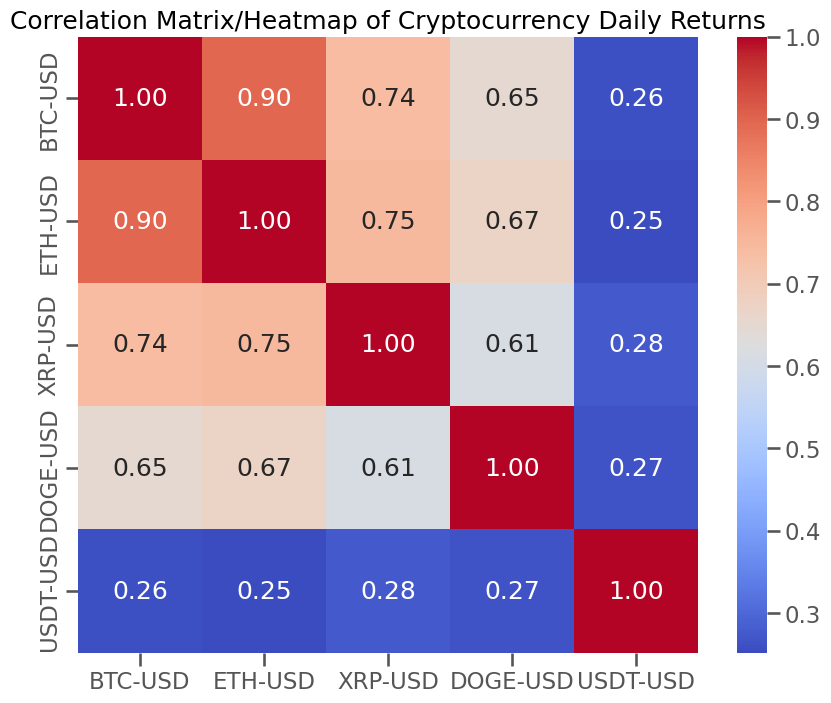

In [93]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix/Heatmap of Cryptocurrency Daily Returns')
plt.show()

##### Corr Analysis

The correlation matrix for the daily returns of Bitcoin (BTC), Ethereum (ETH), XRP, Dogecoin (DOGE), and Tether (USDT) offers insights into how these cryptocurrencies move relative to each other:

*High Correlations*
- **Bitcoin and Ethereum**: With a correlation coefficient of 0.90, BTC and ETH show a very strong positive correlation. This suggests that they often move in the same direction at the same time. The high correlation can be attributed to their shared status as leading cryptocurrencies, which often means they are similarly influenced by market conditions, investor sentiment, and regulatory news.
- **Ethereum and XRP**: ETH and XRP also exhibit a strong correlation of 0.75. This relationship indicates that movements in Ethereum often parallel those in XRP, possibly due to overlapping investor bases and their roles in similar blockchain applications.

*Moderate Correlations*
- **XRP and Bitcoin, Dogecoin**: XRP shows a correlation of 0.74 with BTC and 0.61 with DOGE. These moderate correlations suggest that while there is some alignment in how these currencies move, each has distinct factors that independently influence its price.
- **Dogecoin and Ethereum, Bitcoin**: Dogecoin's correlation with ETH (0.67) and BTC (0.65) indicates moderate alignment, which may be influenced by the broader crypto market trends that affect all digital assets, albeit to varying extents.

*Lower Correlations w/Tether*
- **All Cryptocurrencies w/Tether**: Tether shows notably lower correlation coefficients with BTC (0.26), ETH (0.25), XRP (0.28), and DOGE (0.27). As a stablecoin, Tether is pegged to the US dollar and designed to maintain a constant value, which fundamentally differs from the other cryptocurrencies that are subject to more significant market fluctuations. Thus, its movements are less synchronized with those of speculative cryptocurrencies.

#### FTX Analysis

##### FTX Delta

In [96]:
# 11/11/22 Delta
price_on_nov_10 = crypto_prices.loc['2022-11-10']
price_on_nov_11 = crypto_prices.loc['2022-11-11']

daily_change_nov_11 = (price_on_nov_11 - price_on_nov_10) / price_on_nov_10 * 100

BTC-USD    -3.14
ETH-USD    -0.94
XRP-USD    -2.92
DOGE-USD   -5.46
USDT-USD    0.04
dtype: float64


In [103]:
# Nov. 2022 Delta
price_start_nov = crypto_prices.loc['2022-11-01']
price_end_nov = crypto_prices.loc['2022-11-30']

monthly_change_nov = (price_end_nov - price_start_nov) / price_start_nov * 100

BTC-USD    -16.19
ETH-USD    -17.98
XRP-USD    -12.02
DOGE-USD   -25.05
USDT-USD     0.01
dtype: float64


In [105]:
# FTX Delta results
print("Price Change on November 11, 2022 (%):")
print(daily_change_nov_11)

print("\nOverall Price Change in November 2022 (%):")
print(monthly_change_nov)

Price Change on November 11, 2022 (%):
BTC-USD    -3.14
ETH-USD    -0.94
XRP-USD    -2.92
DOGE-USD   -5.46
USDT-USD    0.04
dtype: float64

Overall Price Change in November 2022 (%):
BTC-USD    -16.19
ETH-USD    -17.98
XRP-USD    -12.02
DOGE-USD   -25.05
USDT-USD     0.01
dtype: float64


##### FTX Delta Results

*Price Changes on November 11, 2022*

| Cryptocurrency | Price Change (%) |
|----------------|------------------|
| BTC-USD        | -3.14            |
| ETH-USD        | -0.94            |
| XRP-USD        | -2.92            |
| DOGE-USD       | -5.46            |
| USDT-USD       | 0.04             |

*Overall Price Changes in November 2022*

| Cryptocurrency | Monthly Change (%) |
|----------------|--------------------|
| BTC-USD        | -16.19             |
| ETH-USD        | -17.98             |
| XRP-USD        | -12.02             |
| DOGE-USD       | -25.05             |
| USDT-USD       | 0.01               |

##### FTX Delta Analysis

*Event Overview*:

In mid-November 2022, the cryptocurrency exchange FTX filed for bankruptcy, a major event that had significant ramifications across the crypto market. The news was compounded by the stepping down of its CEO, Sam Bankman-Fried, which contributed to market instability.

*Immediate Impact*:

The data from November 11, 2022, shows that the bankruptcy announcement had a significant immediate impact on the cryptocurrency market:
- **Bitcoin (BTC)** and **Ripple (XRP)** experienced moderate declines, with Bitcoin dropping by -3.14% and XRP by -2.92%.
- **Ethereum (ETH)** showed a relatively smaller decline of -0.94%, indicating some resilience compared to other major cryptocurrencies.
- **Dogecoin (DOGE)** was the most affected, with a dramatic fall of -5.46%, highlighting its higher sensitivity to market shocks.
- **Tether (USDT)**, being a stablecoin, remained largely unaffected with a minimal change of +0.04%, reaffirming its role in providing stability during market turbulence.

*Long-Term Impact*:

The effects throughout November were more pronounced:
- **BTC, ETH,** and **XRP** saw significant declines of -16.19%, -17.98%, and -12.02% respectively, indicating a tough month following the FTX crisis.
- **DOGE** faced the most substantial decline at -25.05%, showing its vulnerability to prolonged market stress.
- **USDT** showed negligible change (+0.01%), maintaining its peg to the US dollar, demonstrating the effectiveness of stablecoins in avoiding the volatility typical of other cryptocurrencies.

*Conclusion*:

The FTX bankruptcy notably disrupted the cryptocurrency markets, with varying degrees of impact across different assets. The data underscores the volatility of speculative cryptocurrencies and the stability offered by stablecoins like Tether during crises. This event also provides insights into the relative market confidence in different cryptocurrencies, with Ethereum showing relative resilience compared to its peers.

#### Benchmark Comparison

##### Benchmark Data 

In [107]:
# Ticker list
tickers = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'DOGE-USD', 'USDT-USD', '^GSPC']

# Fetch data
data = yf.download(tickers, start=start_date, end=end_date)['Close']

[*********************100%%**********************]  6 of 6 completed


##### Benchmark Daily Returns & Vol

In [109]:
# Daily returns
daily_returns = data.pct_change().dropna()

# DR vol
std_devs = daily_returns.std()

# Correlation matrix
corr_matrix = daily_returns.corr()

In [117]:
# Benchmark DR Vol results
print("Daily Returns Standard Deviations:")
print(std_devs)

print("\nCorrelation Matrix:")
print(corr_matrix)

Daily Returns Standard Deviations:
Ticker
BTC-USD    0.03
DOGE-USD   0.06
ETH-USD    0.05
USDT-USD   0.00
XRP-USD    0.04
^GSPC      0.01
dtype: float64

Correlation Matrix:
Ticker    BTC-USD  DOGE-USD  ETH-USD  USDT-USD  XRP-USD  ^GSPC
Ticker                                                        
BTC-USD      1.00      0.65     0.90      0.26     0.74   0.52
DOGE-USD     0.65      1.00     0.67      0.27     0.61   0.38
ETH-USD      0.90      0.67     1.00      0.25     0.75   0.50
USDT-USD     0.26      0.27     0.25      1.00     0.27   0.17
XRP-USD      0.74      0.61     0.75      0.27     1.00   0.39
^GSPC        0.52      0.38     0.50      0.17     0.39   1.00


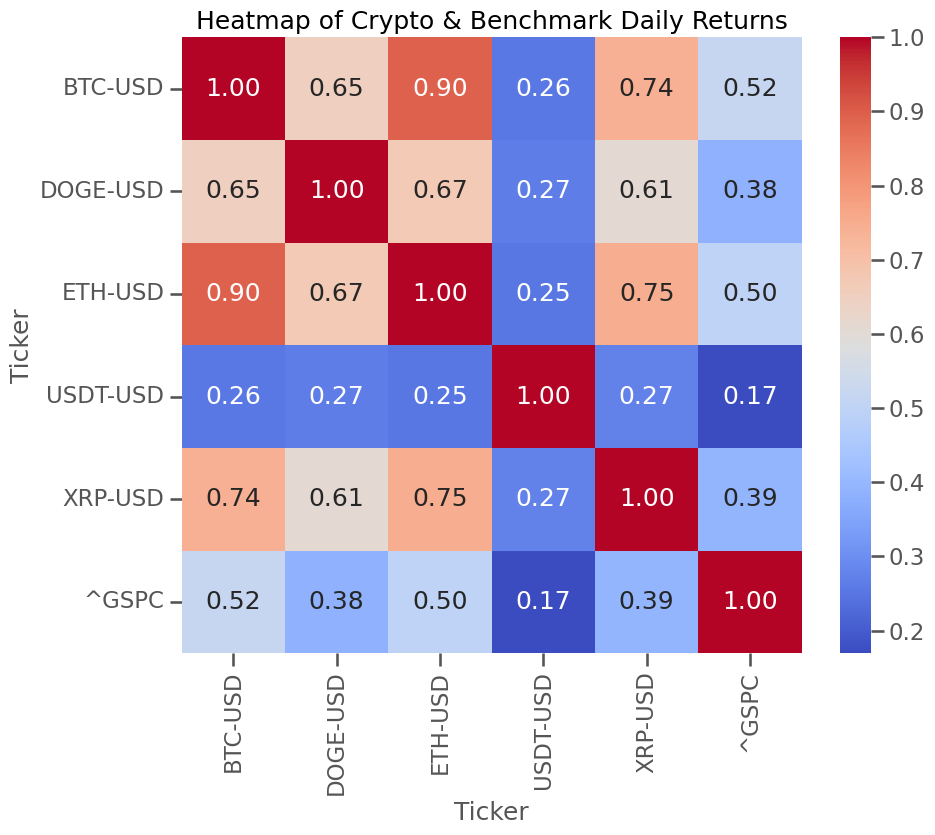

In [114]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Crypto & Benchmark Daily Returns')
plt.show()

##### Benchmark FTX

In [115]:
# Benchmark FTX Single Delta
impact_nov_11 = daily_returns.loc['2022-11-11']

# Benchmark FTX Month Delta
price_start_nov = data.loc['2022-11-01']
price_end_nov = data.loc['2022-11-30']

monthly_change_nov = (price_end_nov - price_start_nov) / price_start_nov * 100

In [116]:
# Benchmark FTX results
print("\nImpact on November 11, 2022:")
print(impact_nov_11)

print("\nOverall Change in November 2022:")
print(monthly_change_nov)


Impact on November 11, 2022:
Ticker
BTC-USD    -0.03
DOGE-USD   -0.05
ETH-USD    -0.01
USDT-USD    0.00
XRP-USD    -0.03
^GSPC       0.01
Name: 2022-11-11 00:00:00, dtype: float64

Overall Change in November 2022:
Ticker
BTC-USD    -16.19
DOGE-USD   -25.05
ETH-USD    -17.98
USDT-USD     0.01
XRP-USD    -12.02
^GSPC        5.81
dtype: float64


##### Benchmark Analysis